<center><h1>Chapter 11 - Convolutional Neural Nets (CNN)</h1></center>

*Convolutional*. Wow, that is a mouthful. Fancy name for something that I think I can make more digestible with some pictures.



In [ ]:
%%capture
!pip install pyforest
import pyforest  #will handle common library imports for us

#I. Say the data we have are images
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

The typical problem that a 2-dimensional CNN is trying to solve is image-classification. Images are viewed as a n by m set of pixels. So in the image below, we have a picture of 3 dogs. The actual Python representation of this is as a list of lists (a matrix) of 20 by 20. Each value in the matrix represents  a pixel.

<img src='https://miro.medium.com/max/616/1*jrnH-yMLOiSybB1u3I-OVA.png' height=300>


##Plain old ANN not up to the task

We could just flatten the 20x20 matrix into a list of 400 values. Then have an ANN with 400 input nodes. The problem is that a node may learn to spot a nose in the image above. But I could take the same image and shift the dogs to the left in it. Noses are now in a entirely new section of the image and hence are now on different input nodes.

In general, an ANN will be terrible at this task unless we can guarantee that noses, eyes, ears are always in the same set of pixels for each new image.  Kind of a hard problem.

##Someone had an insight: use human image classification as model

What do we know about the visual cortex in human and animals?

<img src='https://www.dropbox.com/s/qgal197po04v2zp/Screenshot%202020-05-29%2015.28.03.png?raw=1' height=300>

<img src='https://www.dropbox.com/s/pzsxah4p943k2ms/Screenshot%202020-05-29%2015.28.25.png?raw=1' height=300>

##What can we learn from this?

We need a way to process pixels within regions. So find a way to keep the 2D matrix as input. Our input is no longer a list of numbers. It is a matrix.

And find a way to mimic the layered architecture of the visual cortex that goes from simple feature detection to complex feature detection.

Let's take the regions first.

<img src='https://www.dropbox.com/s/85cstbzp3bjxyy4/Screenshot%202020-05-31%2011.07.41.png?raw=1' height=600>

##Learning

The filter's values are weights. They start in a random state. They are changed through backpropagation.

##You can have hundreds of filters

Both the number of filters and their dimensions and their stride are hyperparameters.

<img src='https://www.simplilearn.com/ice9/free_resources_article_thumb/pooling.JPG' height=300>

##But wait

Why won't the hundreds of filters just be duplicates of each other? They could be :) They do all convolve in exactly the same way.

But highly unlikely given they all start with separate random weights. In fact, what you find is that they tend to graudally learn different patterns over training. If I take the filters output matrices and print each as an image, I may see something like this (this is for a color image).

<img src='https://www.dropbox.com/s/oeupfxuawe5wyxw/Screenshot%202020-05-29%2013.59.16.png?raw=1' height=300>

##We can have many layers of filters

<img src='https://www.dropbox.com/s/zuwiiubwfyp3q1y/Screenshot%202020-05-30%2011.41.02.png?raw=1'>

##Pooling

Eventually you may want to pool. In essence, take the dominant cell within a region as the representative of that region. It also involves convolution with same hyperparameters: how many poolers, size of each pooler, etc.

<img src='https://www.dropbox.com/s/id9bzmpnzn9dkht/Screenshot%202020-05-30%2011.19.12.png?raw=1'>

###A caveat

I've seen some say recently that pooling is unnecessary. You do not have to include a pooling layer. However, we will use it for our examples.

##Final piece

The last part of a CNN is a plain old ANN. So you flatten the matrix from the last pooling layer and just feed to an ANN like we have been studying. In the image below, the matrix we flatten is the last layer of the filtering layers.


<img src='https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/10/CNN-2.png'>



#II. No easy way to hide things in puddles
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

I've been trying to shield you from some of the hairier aspects of the libraries we have been using. But I don't see an easy way to do that with CNNs. There are too many choices to make. So I'll start using the base libraries.

The good news is a lot is standardized so you just have to figure out what you want to change. The bad news is that if you make errors, can be really hard to figure them out. Here's to not making errors!


#III. Two new libraries: tensorflow and numpy
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

We will have to work with both from here on out.

Tensorflow came out of the Google Brain project in 2015. It is interesting in that it works well with GPUs.


###A few built-in datasets

I'll use a chain of tensorflow attributes and a method to load in something called the MNIST dataset. Normally we would have to load the pandas table then wrangle. MNIST is so popular, the tensorflow developers have pre-split it for us. So easy if can get past the complicated chain line.

In [ ]:
import tensorflow as tf
tf.random.set_seed(1234)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  #yuck - comnplicated

11493376/11490434 [==============================] - 0s 0us/step


##2 different lists are returned

Kind of slick. It does the random split for us. It returns 2 lists of 2 items each. We can use Python unpacking to separate into 4 different variables.

Let's take a look at them.

In [ ]:
len(x_train)  #number of separate images in training set

60000

In [ ]:
len(x_test)  #number of images in test set

10000

In [ ]:
y_train[0]  #image 0 is labeled as digit 5

5

##Python lists replaced by numpy arrays

The tensorflow developers decided that the library will only work with numpy arrays.


In [ ]:
pylist = [1,2,3]
nparray = np.array(pylist)
assert nparray.tolist()==pylist
nparray

<IPython.core.display.Javascript object>

array([1, 2, 3])


What is in `x_train` is a "list of lists" but now an array of arrays. Each inner array is one row of 28 values. The outer array is a list of 28 rows. Hence, we have a 28 by 28 image.

In [ ]:
x_train[0]  #28 rows of 28 values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
n_rows = len(x_train[0])
n_cols = len(x_train[0][0])

In [ ]:
print(n_rows, n_cols)

28 28


##Each image is in grayscale

You can view the image as having 28*28 pixels. Each pixel can take on a value from 0-255, where 0 is black and 255 is white.

In [ ]:
x_train[0][12]  #look at 13th row

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
       253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)



I'll choose one of the images and show what it looks like in pixelalized form.

You can see I am using the plt method `imshow`.

Image label:  8


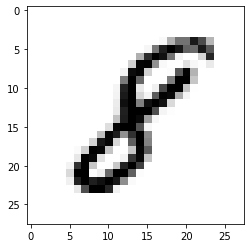

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print('Image label: ', y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

###60 more

Fancier plotting code to generate multiple plots.

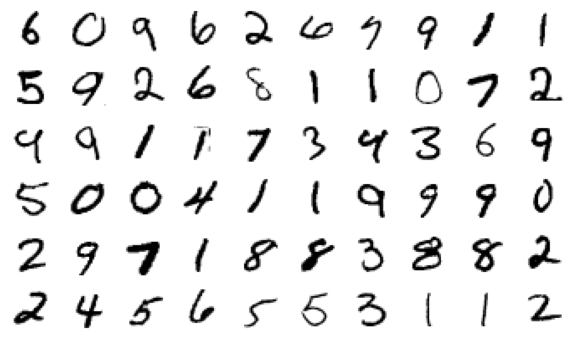

In [ ]:
# show multiple images chosen randomly 
fig, axs = plt.subplots(6, 10, figsize=(10, 6)) # 6 rows of 10 images
from random import randrange
for ax in axs.flat:
    i = randrange(6000)
    ax.imshow(x_train[i], cmap='gray_r')
    ax.set_axis_off()

##Now some wrangling


I can tell you that currently `x_train` is a 3D numpy matrix. It has a "shape" of (60000, 28, 28). In essence, 60000 28x28 images. We need to add a 4th dimension of 1 to make tensorflow happy. I'll use the numpy method `reshape`. Note that the number of pixels remains the same even though added a 4th dimension. Why? Because that 4th dimension is 1 :)


In [ ]:
x_train.shape  #want to change this to (60000, 28, 28, 1)

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API.

x_train = x_train.reshape(60000, 28, 28, 1)  #add 4th dimension of 1
x_test = x_test.reshape(10000, 28, 28, 1)

print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


The values in the images are greyscale values that range from 0 (black) to 255 (white). Let's scale them to between 0 and 1.

The numpy `astype('float32')` method is similar to using a list comprehension if had lists:
<pre>
py_train = [float(item) for item in py_train]
</pre>
The scaling code is similar to:
<pre>
py_train = [item/255. for item in py_train]
</pre>

In [ ]:

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Simple scale of the greyscale values where 255 is max value
x_train /= 255.
x_test /= 255.

x_train[0][12]  #look at 13th row


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04313726],
       [0.74509805],
       [0.99215686],
       [0.27450982],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

##Done wrangling - build model

I am going to use some standard pieces of the tensorflow library. You can view them as a type of boilerplate if you decide to use a CNN.

In [ ]:
#bring in pieces we will need

from tensorflow.keras import Sequential  #we have seen this before

from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, Flatten, MaxPooling2D


##First I'll build a model in one code cell

In [ ]:

# Creating a Sequential Model
model = Sequential()

#32 filters of 3 by 3 pixels
model.add(Conv2D(32, (3, 3), activation='relu',
                  input_shape=(n_rows, n_cols, 1)))

#2 by 2 pooling layer
model.add(MaxPooling2D((2, 2)))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten())

#This is adding a hidden layer of 100 nodes
model.add(Dense(100, activation=tf.nn.relu))

#This is causing dropout on hidden layer at 2% probability
model.add(Dropout(0.2))

#This defines the final output, which has 10 nodes, one for each digit.
model.add(Dense(10,activation=tf.nn.softmax))  #output

##Model summary

We have a single filter layer (Conv2D) that defines 28 filters of 3x3, and a single pooling layer of 2x2. That's it for the convolution piece. We flatten and then feed that into an ANN hidden layer and then into an output layer. The output layer has 10 nodes, one for each digit.

You can see we are using RELU for hidden layer. We have seen that. What is new is Dropout layer. It's another tool to avoid overfitting we discussed in chapter 9.

Also, the output layer has an activation function of softmax where we have seen sigmoid in past. Basically, it is used for multi-class problems. After applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities.


In [ ]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', #used for non-binary output
            metrics=['accuracy'])

##More hyperparameters

I was hiding these from you. Now they are out in the open.

* `optimizer='adam'`. adam is pretty slick. It computes an adaptable learning rate for each weight (!)

* `loss='sparse_categorical_crossentropy'`. This is the loss function to use for multi-class problems with mutually exclusive values, e.g., MNIST where an image is one and only one of the 10. Note that loss is now across all 10 outputs. Nine of them should be 0 for any row and one of them 1. So I get 10 losses that I average over.

**Big caveat**: `sparse_categorical_crossentropy` will automatically one-hot encode the labels. As they stand now, they are a single number between 0 and 9. It will build an array of length 10 for each label and place a 1 in the appropriate location. 

<img src='https://www.dropbox.com/s/ahkhjf1iwuwbtqd/Screen%20Shot%202021-05-22%20at%2012.04.58%20PM.png?raw=1' height=350>

If you do not use this loss function, you will have to one-hot encode the labels yourself.



Let's give 1 epochs a shot. See how we do.

In [ ]:
training = model.fit(x=x_train,y=y_train, epochs=1)  #20 seconds

1875/1875 [==============================] - 22s 12ms/step - loss: 0.3721 - accuracy: 0.8878


In [ ]:
training.history['accuracy'][:10]


[0.9422666430473328]

##Let's move to testing

We could try more epochs but I'm going to press forward.

###Try testing on one image

I'll choose one that is kind of messy. It is a 9.

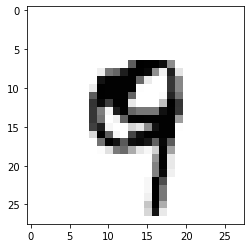

In [ ]:
image_index = 4444

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [ ]:
pred = model.predict(x_test[image_index].reshape(1, n_rows, n_cols, 1))
pred

array([[1.97052810e-08, 1.26400606e-08, 5.39988093e-07, 8.20374044e-06,
        4.27441819e-06, 1.01057776e-05, 7.54384288e-08, 2.71134536e-06,
        5.47167474e-06, 9.99968529e-01]], dtype=float32)

###Look at those 10 numbers

None but 9 are close to winning value of 1.0. That is good! We don't want close wins. In essence, `loss='sparse_categorical_crossentropy'` takes that into account. It checks how "pure" the winner is. If there are a number of digits close to the winner, that is not good.

In [ ]:
#I wish this method was built into Python!
pred.argmax()  #numpy method for finding max and returning its index

9

##Run on test set

I can run on the entire test set now and get an overall accuracy and loss. I'm using a new method evaluate that applies the >=.5 decision rule for us. So just spits out the loss and accuracy.

In [ ]:
model.evaluate(x_test, y_test)  #10000 rows in test set

313/313 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9777


[0.06832972168922424, 0.9776999950408936]

##Results

Not bad. Remember that given images evenly distributed, we would be guessing by rolling a 10-sided dice. Expect about 10% accuracy from random guessing.

#IV. Move into the fashion world
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>\
Let's see if we can use most of what we have done with digits on a new problem, recognizing fashion accessories. Here is a sample of the grayscale images we will be working with.


<img src='https://tensorflow.org/images/fashion-mnist-sprite.png'>

###The 10 possible label values

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Load the data and print a few images

In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


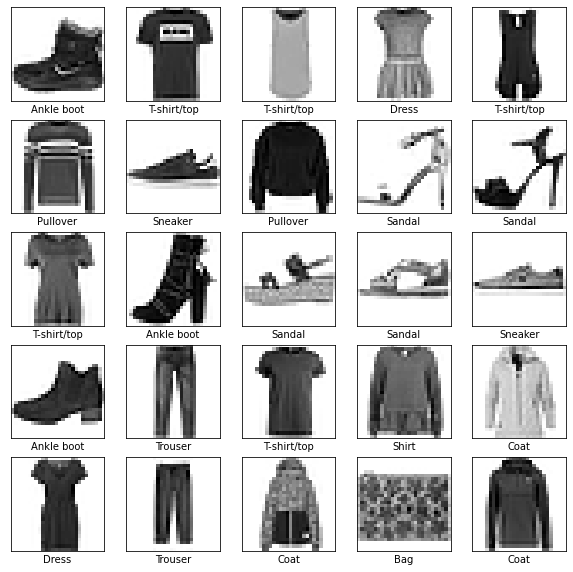

In [ ]:
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

##Wrangle in one cell

Exactly the same as digits given they were also 28 by 28 and grayscale.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape((x_train.shape[0], n_rows, n_cols, 1))
x_test = x_test.reshape((x_test.shape[0], n_rows, n_cols, 1))


##Build model

I'll use same one as with digits.

In [ ]:
tf.random.set_seed(1234)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                  input_shape=(n_rows, n_cols, 1)))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(100, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10,activation=tf.nn.softmax))  #output

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', #used for non-binary output
            metrics=['accuracy'])

###Train with 1 epoch

In [ ]:
training = model.fit(x=x_train,y=y_train, epochs=1)  #20 seconds

1875/1875 [==============================] - 23s 12ms/step - loss: 0.5732 - accuracy: 0.7955


In [ ]:
training.history['accuracy'][:10]


[0.8471500277519226]

###Try testing on one image


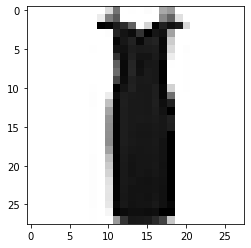

In [ ]:
image_index = 4444

plt.imshow(x_test[image_index].reshape(n_rows, n_cols),cmap='Greys')

In [ ]:
test_image = x_test[image_index].reshape(1, n_rows, n_cols, 1)  #reshape to make tf happy
pred = model.predict(test_image)
pred

array([[6.7539763e-04, 2.8336777e-03, 3.6490990e-05, 9.9608862e-01,
        9.9343415e-05, 2.1154972e-06, 1.4041674e-04, 6.3120710e-06,
        6.7559602e-05, 5.0093447e-05]], dtype=float32)

###How did we do?

In [ ]:

class_names[pred.argmax()]

'Dress'

##Run on test set



In [ ]:
model.evaluate(x_test, y_test)  #10000 rows in test set

313/313 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.8832


[0.31873878836631775, 0.8831999897956848]

##Not bad for 1 epoch

Random guessing will get us about 10% accuracy. We are getting 88%.

##Lots more exploring that is possible

It's even more complicated than with a straight ANN. Now we have new layer types and ways to weave them together.

<img src='https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/10/CNN-2.png'>


#Almost challenge 1
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

I was going to ask you to find some images on the web and try out a CNN on them. But I decided not - too little time. And I am not sure how many of you will actually be working with image data.

So I am using the 2D CNN as a lead in to working with time-series data and a 1D CNN. This seems much more likely to be of use to you at some point. Stay tuned.